In [41]:
import networkx as nx
from networkx.readwrite import json_graph
import pandas as pd
import numpy as np

import snap as sn
from operator import itemgetter
import community as community


import glob
import os, os.path
import math
import csv
import json


import scipy as sp
from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering


from scipy.stats import t

from mpl_toolkits.mplot3d import Axes3D


import matplotlib.pyplot as plt
import mplleaflet
from pylab import show
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [42]:
#Get the station data -
##6,j,z rush hour lines are missing
##s station lines are not listed fully
ndata = pd.read_csv("data/nyc_subway_stations_with_lines.csv")

In [43]:
ndata.head(3)

,Unnamed: 0,stop_id,stop_name,stop_lat,stop_lon,Borough,Daytime Routes
0,0,101,Van Cortlandt Park - 242 St,40.889248,-73.898583,Bx,1
1,1,103,238 St,40.884667,-73.900870,Bx,1
2,2,104,231 St,40.878856,-73.904834,Bx,1


In [44]:
#initialize the graph
G.clear()
G = nx.MultiDiGraph(name='NYC Subway Network')

In [45]:
#add nodes and attributes
for i in range(0,len(ndata)):
    G.add_node(ndata.stop_id[i], name = ndata.stop_name[i], line = ndata['Daytime Routes'][i], boro = ndata.Borough[i], lat = ndata.stop_lat[i], lng = ndata.stop_lon[i])

In [46]:
#show the nodes in G
#G.nodes(data=True)

In [47]:
#get the edge data and attributes
edata = pd.read_csv("data/subway_duration_between_stops_weekday(common_route).csv")

In [48]:
edata.head(2)

,Unnamed: 0,bound,duration,from_stop,from_stop_id,from_stop_sequence,route_id,service_id,to_stop,to_stop_id,to_stop_sequence,train
0,0,N,180,Prospect Park,D26N,1,A..N55R,B20170625WKD,Botanic Garden,S04N,2,FS
1,1,N,120,Botanic Garden,S04N,2,A..N55R,B20170625WKD,Park Pl,S03N,3,FS


In [49]:
#add node id to edge data
edata['from_node_id']= edata['from_stop_id'].str[:3]

edata['to_node_id']= edata['to_stop_id'].str[:3]

In [50]:
edata.head(2)

,Unnamed: 0,bound,duration,from_stop,from_stop_id,from_stop_sequence,route_id,service_id,to_stop,to_stop_id,to_stop_sequence,train,from_node_id,to_node_id
0,0,N,180,Prospect Park,D26N,1,A..N55R,B20170625WKD,Botanic Garden,S04N,2,FS,D26,S04
1,1,N,120,Botanic Garden,S04N,2,A..N55R,B20170625WKD,Park Pl,S03N,3,FS,S04,S03


In [51]:
#ADD THE EDGES
for i in range(0,len(edata.from_node_id)):
    G.add_edge(edata.from_node_id[i],edata.to_node_id[i], 
               weight = edata.duration[i],
               edge_id = edata.from_stop_id[i], 
               to_edge_id = edata.to_stop_id[i],
               duration = edata.duration[i],
               from_node_id = edata.from_node_id[i],
               to_node_id = edata.to_node_id[i],
               bound = edata.bound[i],
               train = edata.train[i])


In [78]:
#ADD TRANSFER WITHOUT SWIPE EDGES
tdata = pd.read_csv("data/transfer_without_swipe.csv")
tdata.head(30)

,Unnamed: 0,from_stop_id,to_stop_id,transfer_type,min_transfer_time,from_stop,to_stop,from_line,to_line
0,0,112,A09,2,180,168 St - Washington Hts,168 St,1,A
1,1,112,A09,2,180,168 St - Washington Hts,168 St,1,C
2,2,120,120,2,180,96 St,96 St,1,2
3,3,120,120,2,180,96 St,96 St,1,3
4,4,120,120,2,180,96 St,96 St,2,1
5,5,120,120,2,180,96 St,96 St,2,3
6,6,120,120,2,180,96 St,96 St,3,1
7,7,120,120,2,180,96 St,96 St,3,2
8,8,123,123,2,0,72 St,72 St,1,2
9,9,123,123,2,0,72 St,72 St,1,3


In [53]:
for i in range(0,len(tdata.from_stop_id)):
    G.add_edge(tdata.from_stop_id[i],tdata.to_stop_id[i],
               weight = tdata.min_transfer_time[i],
               edge_id = tdata.from_stop_id[i]+"T_"+tdata.to_line[i], 
               to_edge_id = tdata.to_stop_id[i]+'TF_'+tdata.from_line[i],
               duration = tdata.min_transfer_time[i],
               from_node_id = tdata.from_stop_id[i],
               to_node_id = tdata.to_stop_id[i],
               bound = 'na',
               train = tdata.from_line[i]+" "+ tdata.to_line[i])

In [54]:
print nx.info(G)

Name: NYC Subway Network
Type: MultiDiGraph
Number of nodes: 498
Number of edges: 2548
Average in degree:   5.1165
Average out degree:   5.1165


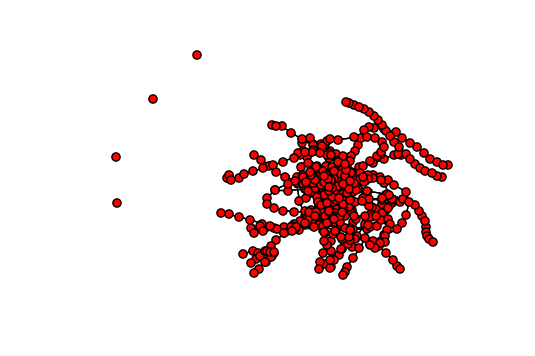

In [55]:
plt.axis("off")
spring_pos = nx.spring_layout(G)
circular =nx.circular_layout(G)
nx.draw_networkx(G, pos = spring_pos, with_labels = False, node_size = 35)

In [56]:
#Method 1 - betweenness_centrality
#compute the betweeness centrality to determine who is the most "important" individual in the network.
#using betweenness centrality is a measure of how many shortest paths pass through a particular vertex.
#Method from http://glowingpython.blogspot.com/2013/02/betweenness-centrality.html
#we need to convert our network to an undirected one first

def most_important(G):

  ranking = nx.betweenness_centrality(G).items()
  
  r = [x[1] for x in ranking]
  m = sum(r)/len(r) # mean centrality
  t = m*3 # threshold, we keep only the nodes with 3 times the mean
  Gt = G.copy()
  for k, v in ranking:
    if v < t:
      Gt.remove_node(k)
  return Gt



In [57]:
dominant = most_important(G)

In [94]:
#print dominant nodes and its neighbors
for i in range(1,len(dominant.nodes())):
    print (dominant.neighbors(dominant.nodes()[i]));

['G21', 'G14']
['R20', 'Q01', 'R31', 'R30']
['239', '235']
['239', '235', 'R31']
['R36', 'R31']
['R29', 'Q01', 'R30', 'R31']
['235', 'R36', 'Q01', 'R30', 'R31']
['A46', 'A42', 'A48']
['A46', 'A42', 'A41']
['A42', 'R29', 'A41']
['A46', 'A51', 'A48']
['621', '416', '626']
['621', '629', '626']
['631', '626', 'R11', '629']
['A51', 'A48']
['621', '416', '222']
['631', '635', '629']
['631', '635', 'R20']
['A15', 'A24', 'A27']
['R16', 'A24', 'A27']
['217', '218']
['217', '218', '219']
['220', '218', '219']
['R17', 'A27', 'R16']
['R16', 'R17', 'R20']
['G21', '629', 'R11']
['D26']
['416', '222', '221']
['222', '221', '220']
['219', '221', '220']
['A15', 'A24', 'A12']
['A15', 'A12']
['R30', 'A41']
['R17', '635', 'Q01', 'R20']


In [98]:
#print dominant nodes and node attributes
dominant.nodes(data=True)

[('G21',
  {'boro': 'Q',
   'lat': 40.748972999999999,
   'line': 'E M R',
   'lng': -73.937243000000009,
   'name': 'Queens Plaza'}),
 ('G14',
  {'boro': 'Q',
   'lat': 40.746644000000003,
   'line': 'E F M R',
   'lng': -73.891338000000005,
   'name': 'Jackson Hts - Roosevelt Av'}),
 ('Q01',
  {'boro': 'M',
   'lat': 40.718383000000003,
   'line': 'N Q',
   'lng': -74.000460000000004,
   'name': 'Canal St'}),
 ('239',
  {'boro': 'Bk',
   'lat': 40.670681999999999,
   'line': '2 3 4 5',
   'lng': -73.958131000000009,
   'name': 'Franklin Av'}),
 ('235',
  {'boro': 'Bk',
   'lat': 40.684359000000001,
   'line': '2 3',
   'lng': -73.977665999999999,
   'name': 'Atlantic Av - Barclays Ctr'}),
 ('R36',
  {'boro': 'Bk',
   'lat': 40.655144,
   'line': 'D N R',
   'lng': -74.003548999999992,
   'name': '36 St'}),
 ('R30',
  {'boro': 'Bk',
   'lat': 40.690635,
   'line': 'B Q R',
   'lng': -73.981824000000003,
   'name': 'DeKalb Av'}),
 ('R31',
  {'boro': 'Bk',
   'lat': 40.683665999999995,


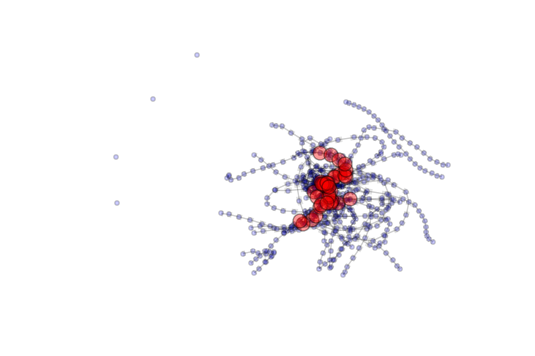

In [58]:
plt.axis("off")

# draw the nodes and the edges (all)
nx.draw_networkx_nodes(G,spring_pos,node_color='b',alpha=0.2,node_size=10)
nx.draw_networkx_edges(G,spring_pos,alpha=0.1)

# draw the most important nodes with a different style
nx.draw_networkx_nodes(dominant,spring_pos,node_color='r',alpha=0.4,node_size=100)
# also the labels this time
#nx.draw_networkx_labels(dominant,spring_pos,font_size=10,font_color='b')
show()

In [59]:
#uses scipi arc pak to determine most important node by spectral theory power method
def most_important(G):

  ranking = nx.eigenvector_centrality_numpy(G).items()
  
  r = [x[1] for x in ranking]
  m = sum(r)/len(r) # mean centrality
  t = m*3 # threshold, we keep only the nodes with 3 times the mean
  Gt = G.copy()
  for k, v in ranking:
    if v < t:
      Gt.remove_node(k)
  return Gt

dominante3 = most_important(G)

In [96]:
#print dominant nodes and its neighbors
for i in range(1,len(dominante3.nodes())):
    print (dominante3.neighbors(dominante3.nodes()[i]));

['123', '127']
['902', 'R16', '123', 'A27', '725', '127', '128']
['128', '127']
['D17', 'R17']
['A24', 'A25', 'A27']
['A24', 'A25', 'A27']
['902', 'R16', 'A24', 'A25', 'A27', 'A28', '725', '127']
['A28', 'A27']
['902', 'R17', 'R14', 'R15', 'A27', '725', '127', 'R16']
['R16', 'R17', 'D17']
['R16', 'R14', 'R15']
['R16', 'R14', 'R15']
['902', 'R16', 'A27', '127']


In [97]:
#print dominant nodes and node attributes
dominante3.nodes(data=True)

[('902',
  {'boro': 'M',
   'lat': 40.755983000000001,
   'line': 'S',
   'lng': -73.986229000000009,
   'name': 'Times Sq - 42 St'}),
 ('123',
  {'boro': 'M',
   'lat': 40.778453000000006,
   'line': '1 2 3',
   'lng': -73.98196999999999,
   'name': '72 St'}),
 ('127',
  {'boro': 'M',
   'lat': 40.755290000000002,
   'line': '1 2 3',
   'lng': -73.987494999999996,
   'name': 'Times Sq - 42 St'}),
 ('128',
  {'boro': 'M',
   'lat': 40.750372999999996,
   'line': '1 2 3',
   'lng': -73.991056999999998,
   'name': '34 St - Penn Station'}),
 ('D17',
  {'boro': 'M',
   'lat': 40.749718999999999,
   'line': 'B D F M',
   'lng': -73.987822999999992,
   'name': '34 St - Herald Sq'}),
 ('A24',
  {'boro': 'M',
   'lat': 40.768295999999999,
   'line': 'A B C D',
   'lng': -73.981735999999998,
   'name': '59 St - Columbus Circle'}),
 ('A25',
  {'boro': 'M',
   'lat': 40.762456,
   'line': 'C E',
   'lng': -73.985984000000002,
   'name': '50 St'}),
 ('A27',
  {'boro': 'M',
   'lat': 40.75730800000

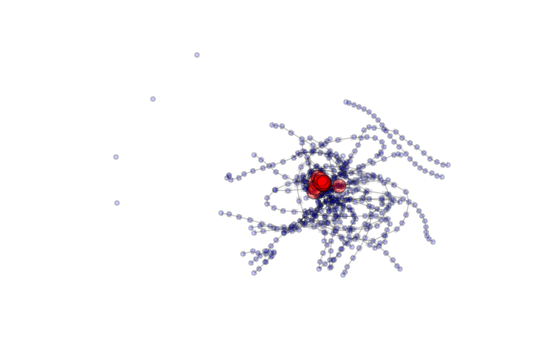

In [60]:
plt.axis("off")

# draw the nodes and the edges (all)
nx.draw_networkx_nodes(G,spring_pos,node_color='b',alpha=0.2,node_size=10)
nx.draw_networkx_edges(G,spring_pos,alpha=0.1)

# draw the most important nodes with a different style
nx.draw_networkx_nodes(dominante3,spring_pos,node_color='r',alpha=0.4,node_size=100)
# also the labels this time
#nx.draw_networkx_labels(dominante3,spring_pos,font_size=10,font_color='b')
show()

In [82]:
#plotting on a map
ndatamap = ndata[['stop_id','stop_lon','stop_lat']]
pos=ndatamap.set_index('stop_id').T.to_dict('list')

fig, ax = plt.subplots(figsize=(15,15))

nx.draw_networkx_nodes(G,pos=pos,node_size=10,node_color='red',edge_color='k',alpha=.5, with_labels=True)
nx.draw_networkx_edges(G,pos=pos,edge_color='gray', alpha=.1)
nx.draw_networkx_labels(G,pos, label_pos =10.3)

mplleaflet.display(fig=ax.figure)


In [105]:
#Dijkstra’s algorithm to find the shortest path in a weighted network
short_paths = path=nx.all_pairs_dijkstra_path(G, weight = 'weight')
sp = pd.DataFrame(short_paths)
sp.to_csv('data/shortest_paths')
sp.head(2)

,101,103,104,106,107,108,109,110,111,112,...,S22,S23,S24,S25,S26,S27,S28,S29,S30,S31
101,[101],"[103, 101]","[104, 103, 101]","[106, 104, 103, 101]","[107, 106, 104, 103, 101]","[108, 107, 106, 104, 103, 101]","[109, 108, 107, 106, 104, 103, 101]","[110, 109, 108, 107, 106, 104, 103, 101]","[111, 110, 109, 108, 107, 106, 104, 103, 101]","[112, 111, 110, 109, 108, 107, 106, 104, 103, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103,"[101, 103]",[103],"[104, 103]","[106, 104, 103]","[107, 106, 104, 103]","[108, 107, 106, 104, 103]","[109, 108, 107, 106, 104, 103]","[110, 109, 108, 107, 106, 104, 103]","[111, 110, 109, 108, 107, 106, 104, 103]","[112, 111, 110, 109, 108, 107, 106, 104, 103]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
#next steps: sum duration for paths provided

In [102]:
#get the weights of all the edges (node pairs)
edge_weights = pd.DataFrame(G.edges(data='weight'))
edge_weights.head()

,0,1,2
0,G26,G24,150
1,G26,G28,90
2,G24,G26,180
3,G24,G22,60
4,G22,G24,60


In [64]:
#network to file
graph = nx.to_pandas_dataframe(G)
graph.to_csv('data/graph_data')

In [65]:
#node data
node_data = G.nodes(data=True)
nd_data = pd.DataFrame(node_data)
nd_data.to_csv('data/node_data')

In [66]:
#nodes with no edges
no_edges = nx.isolates(G)
noedges = pd.DataFrame(no_edges)
noedges.to_csv('data/no_edges')
print noedges

     0
0  M10
1  S12
2  S10
3  M09


In [75]:
edge_data = [(n,nbrdict) for n,nbrdict in G.adjacency_iter()]
e_data = pd.DataFrame(node_data)
e_data.to_csv('data/edge_data')

In [71]:
data = json_graph.node_link_data(G)

In [72]:
with open('nodelinkdata.json', 'w') as outfile:
    json.dump(data, outfile)

In [73]:
datatwo = json_graph.adjacency_data(G)

In [74]:
with open('adjacencydata.json', 'w') as outfile:
    json.dump(datatwo, outfile)

In [ ]:
#next steps: visualize in nodelink and adjacency format in d3

Useful Methods<br>
MultiDiGraph.__init__([data])	<br>
MultiDiGraph.add_node(n[, attr_dict])	Add a single node n and update node attributes.<br>
MultiDiGraph.add_nodes_from(nodes, attr)	Add multiple nodes.<br>
MultiDiGraph.remove_node(n)	Remove node n.<br>
MultiDiGraph.remove_nodes_from(nbunch)	Remove multiple nodes.<br>
MultiDiGraph.add_edge(u, v[, key, attr_dict])	Add an edge between u and v.<br>
MultiDiGraph.add_edges_from(ebunch[, attr_dict])	Add all the edges in ebunch.<br>
MultiDiGraph.add_weighted_edges_from(ebunch)	Add all the edges in ebunch as weighted edges with specified weights.<br>
MultiDiGraph.remove_edge(u, v[, key])	Remove an edge between u and v.<br>
MultiDiGraph.remove_edges_from(ebunch)	Remove all edges specified in ebunch.<br>
MultiDiGraph.add_star(nodes, attr)	Add a star.<br>
MultiDiGraph.add_path(nodes, attr)	Add a path.<br>
MultiDiGraph.add_cycle(nodes, attr)	Add a cycle.<br>
MultiDiGraph.clear()	Remove all nodes and edges from the graph.<br>